In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import tensorflow as tf
import random

In [ ]:
#using pickle
import pickle
model_1=open('/content/X_test.pickle', 'rb')
X_test=pickle.load(model_1)

In [ ]:
#using pickle
import pickle
model_2=open('/content/X_train.pickle', 'rb')
X_train=pickle.load(model_2)

In [ ]:
#using pickle
import pickle
model_3=open('/content/y_test.pickle', 'rb')
y_test=pickle.load(model_3)

In [ ]:
#using pickle
import pickle
model_4=open('/content/y_train.pickle', 'rb')
y_train=pickle.load(model_4)

In [ ]:
X_test.shape

(13800, 32, 32)

In [ ]:
X_train.shape

(78200, 32, 32)

In [ ]:
assert(X_train.shape[0]==y_train.shape[0]),"The number of images is not equal to the number of the labels"
assert(X_test.shape[0]==y_test.shape[0]),"The number images is not equal to the number of the labels"
assert(X_train.shape[1:]==(32,32)),"The dimension of the image is not 28x28"
assert(X_test.shape[1:]==(32,32)),"The dimension of the image is not 28x28"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  """


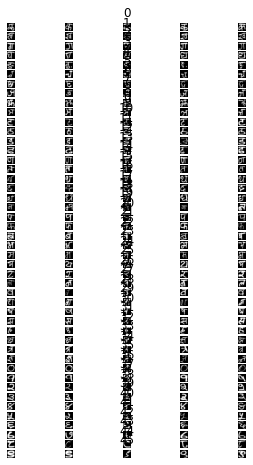

In [ ]:
num_of_samples=[]
cols=5
num_classes=46
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,8))
fig.tight_layout()

for i in range(cols):
  for j in range(num_classes):
    x_selected=X_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:],cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700]


Text(0.5, 1.0, 'distribution of the training datasets')

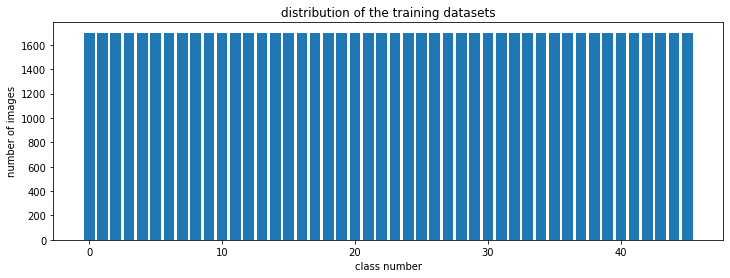

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.xlabel("class number")
plt.ylabel("number of images")
plt.title("distribution of the training datasets")

In [ ]:
y_train.shape

(78200,)

In [ ]:
X_train=X_train.reshape(78200,32,32,1)
X_test=X_test.reshape(13800,32,32,1)

y_train=to_categorical(y_train,46)
y_test=to_categorical(y_test,46)


In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
def leNet_model():
  model=Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(32,32,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Flatten())
  
  model.add(Dense(500,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model=leNet_model()
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 500)               270500    
_________________________________________________________________
dense_19 (Dense)             (None, 46)               

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history=model.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=400,verbose=1,shuffle=1)

Epoch 1/10
176/176 [==============================] - 3s 11ms/step - loss: 1.4123 - accuracy: 0.6242 - val_loss: 29.2906 - val_accuracy: 0.0988
Epoch 2/10
176/176 [==============================] - 1s 8ms/step - loss: 0.1529 - accuracy: 0.9530 - val_loss: 26.6028 - val_accuracy: 0.1235
Epoch 3/10
176/176 [==============================] - 1s 8ms/step - loss: 0.0953 - accuracy: 0.9706 - val_loss: 29.6615 - val_accuracy: 0.1090
Epoch 4/10
176/176 [==============================] - 1s 8ms/step - loss: 0.0719 - accuracy: 0.9760 - val_loss: 28.5697 - val_accuracy: 0.1114
Epoch 5/10
176/176 [==============================] - 1s 8ms/step - loss: 0.0581 - accuracy: 0.9808 - val_loss: 32.2727 - val_accuracy: 0.1166
Epoch 6/10
176/176 [==============================] - 1s 8ms/step - loss: 0.0548 - accuracy: 0.9813 - val_loss: 28.4640 - val_accuracy: 0.0968
Epoch 7/10
176/176 [==============================] - 1s 8ms/step - loss: 0.0429 - accuracy: 0.9862 - val_loss: 30.0379 - val_accuracy: 0.117

Text(0.5, 0, 'epoch')

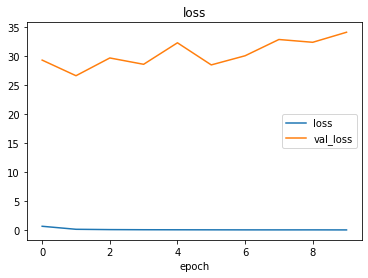

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

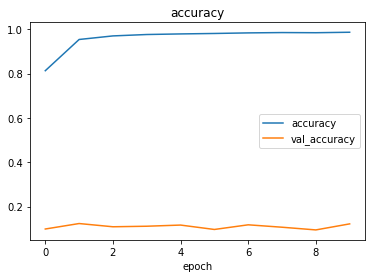

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

<Response [200]>


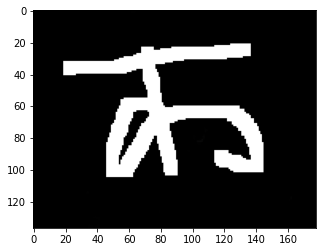

In [ ]:
import requests
from PIL import Image
url='https://raw.githubusercontent.com/darklord0303/Hindi-OCR/master/test2.PNG'
response=requests.get(url,stream=True)
print(response)
img=Image.open(response.raw)
plt.imshow(img,cmap=plt.get_cmap('gray'))

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


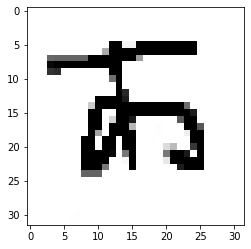

In [ ]:
import cv2
img=np.asarray(img)
img=cv2.resize(img,(32,32))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.bitwise_not(img)
plt.imshow(img,cmap=plt.get_cmap('gray'))
print(img)


In [ ]:
image=img/255
image=image.reshape(1,32,32,1)

In [ ]:
print(image.shape)
prediction=model.predict_classes(image)
print("predicted digit:", str(prediction))


(1, 32, 32, 1)
predicted digit: [1]


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
model.save('devnagri.h5')